In [1]:
library(readr)
comics <- read_csv("comics.csv")
head(comics)

Parsed with column specification:
cols(
  name = col_character(),
  id = col_character(),
  align = col_character(),
  eye = col_character(),
  hair = col_character(),
  gender = col_character(),
  gsm = col_character(),
  alive = col_character(),
  appearances = col_double(),
  first_appear = col_character(),
  publisher = col_character()
)


name,id,align,eye,hair,gender,gsm,alive,appearances,first_appear,publisher
Spider-Man (Peter Parker),Secret,Good,Hazel Eyes,Brown Hair,Male,NA,Living Characters,4043,Aug-62,marvel
Captain America (Steven Rogers),Public,Good,Blue Eyes,White Hair,Male,NA,Living Characters,3360,Mar-41,marvel
"Wolverine (James \""Logan\"" Howlett)",Public,Neutral,Blue Eyes,Black Hair,Male,NA,Living Characters,3061,Oct-74,marvel
"Iron Man (Anthony \""Tony\"" Stark)",Public,Good,Blue Eyes,Black Hair,Male,NA,Living Characters,2961,Mar-63,marvel
Thor (Thor Odinson),No Dual,Good,Blue Eyes,Blond Hair,Male,NA,Living Characters,2258,Nov-50,marvel
Benjamin Grimm (Earth-616),Public,Good,Blue Eyes,No Hair,Male,NA,Living Characters,2255,Nov-61,marvel


In [2]:
str(comics)

Classes 'tbl_df', 'tbl' and 'data.frame':	23272 obs. of  11 variables:
 $ name        : chr  "Spider-Man (Peter Parker)" "Captain America (Steven Rogers)" "Wolverine (James \\\"Logan\\\" Howlett)" "Iron Man (Anthony \\\"Tony\\\" Stark)" ...
 $ id          : chr  "Secret" "Public" "Public" "Public" ...
 $ align       : chr  "Good" "Good" "Neutral" "Good" ...
 $ eye         : chr  "Hazel Eyes" "Blue Eyes" "Blue Eyes" "Blue Eyes" ...
 $ hair        : chr  "Brown Hair" "White Hair" "Black Hair" "Black Hair" ...
 $ gender      : chr  "Male" "Male" "Male" "Male" ...
 $ gsm         : chr  NA NA NA NA ...
 $ alive       : chr  "Living Characters" "Living Characters" "Living Characters" "Living Characters" ...
 $ appearances : num  4043 3360 3061 2961 2258 ...
 $ first_appear: chr  "Aug-62" "Mar-41" "Oct-74" "Mar-63" ...
 $ publisher   : chr  "marvel" "marvel" "marvel" "marvel" ...
 - attr(*, "spec")=
  .. cols(
  ..   name = col_character(),
  ..   id = col_character(),
  ..   align = col_char

## CONTINGENCY TABLE

In [3]:
# Check levels of align
comics$align <- as.factor(comics$align)
levels(comics$align)

[1] "Bad"                "Good"               "Neutral"           
[4] "Reformed Criminals"

In [4]:
# Check the levels of gender
comics$gender <- as.factor(comics$gender)
levels(comics$gender)

[1] "Female" "Male"   "Other"

In [5]:
# Create a 2-way contingency table
table(comics$align, comics$gender)

                    
                     Female Male Other
  Bad                  1573 7561    32
  Good                 2490 4809    17
  Neutral               836 1799    17
  Reformed Criminals      1    2     0

Reformed Crims has low counts => need to be dropped to simplify the analysis

## DROPPING LEVELS

In [6]:
# Load dplyr
library(dplyr)


Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



In [7]:
# Remove align level
comics <- comics %>%
  filter(align != "Reformed Criminals") %>%
  droplevels()

table(comics$align, comics$gender)

         
          Female Male Other
  Bad       1573 7561    32
  Good      2490 4809    17
  Neutral    836 1799    17

## SIDE-BY-SIDE BARCHARTS

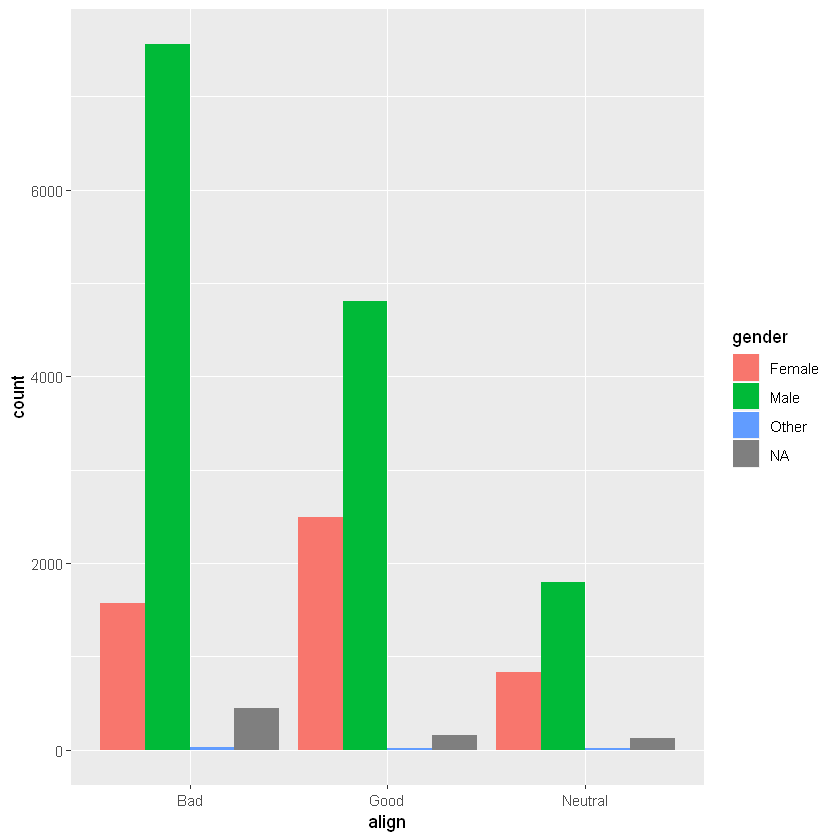

In [8]:
# Load ggplot2
library(ggplot2)

# Create side-by-side barchart of gender by alignment
ggplot(comics, aes(x = align, fill = gender)) + 
  geom_bar(position = "dodge")

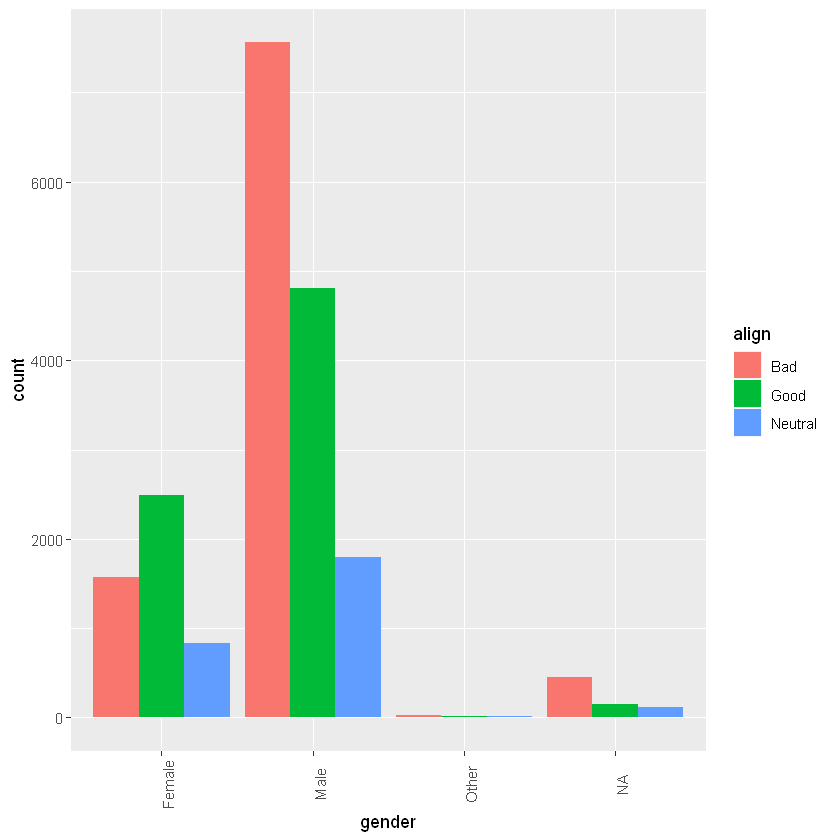

In [9]:
# Create side-by-side barchart of alignment by gender
ggplot(comics, aes(x = gender, fill = align)) + 
  geom_bar(position = "dodge") +
  theme(axis.text.x = element_text(angle = 90))

Across all genders, 'bad' is the most common alignment

## CONDITIONAL PROPORTIONS

In [10]:
tab <- table(comics$align, comics$gender)
options(scipen = 999, digits = 3) # Print fewer digits

In [11]:
# Joint proportions
prop.table(tab)

         
            Female     Male    Other
  Bad     0.082210 0.395160 0.001672
  Good    0.130135 0.251333 0.000888
  Neutral 0.043692 0.094021 0.000888

In [12]:
# Conditional on columns, 1 for row
prop.table(tab, 2)

         
          Female  Male Other
  Bad      0.321 0.534 0.485
  Good     0.508 0.339 0.258
  Neutral  0.171 0.127 0.258

## COUNTS VS PROPORTION

In [13]:
# Change the order of the levels in align
comics$align <- factor(comics$align, 
                       levels = c("Bad", "Neutral", "Good"))

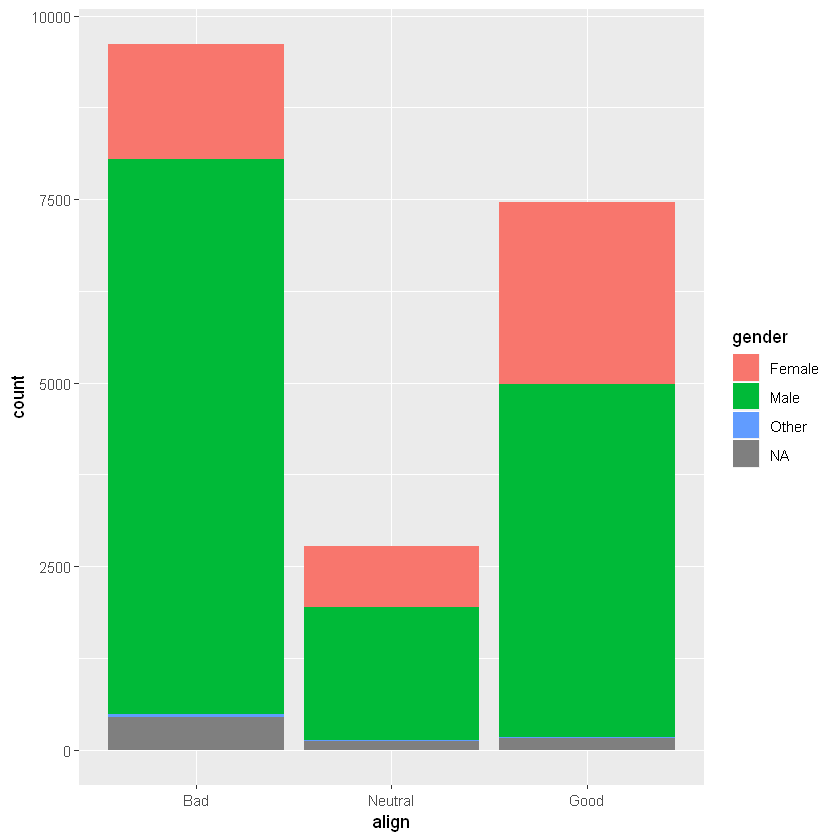

In [14]:
# Plot of gender by align
ggplot(comics, aes(x = align, fill = gender)) +
  geom_bar()

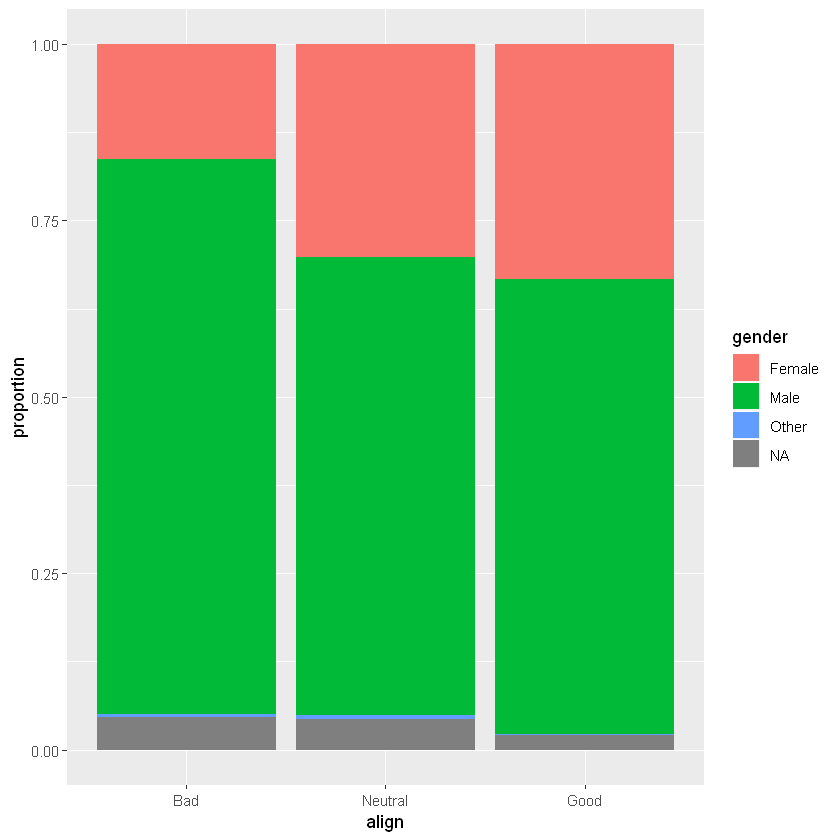

In [15]:
# Plot proportion of gender, conditional on align
ggplot(comics, aes(x = align, fill = gender)) + 
  geom_bar(position = "fill") +
  ylab("proportion")